# ICU Requirement Prediction based on Covid19 patient pre-condition

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

* The dataset I used is https://www.kaggle.com/tanmoyx/covid19-patient-precondition-dataset

In [2]:
df = pd.read_csv('../input/covid19-patient-precondition-dataset/covid.csv')
df.shape

(566602, 23)

In [3]:
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

In [4]:
print('Null values present:',df.isnull().any().any())

Null values present: False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

In [6]:
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


# Feature Description

1. id - The identification number of the patient.
2. sex - Identifies the sex of the patient. (Female - 1, Male - 2)
3. patient_type - Identifies the type of care received by the patient in the unit. It is called an outpatient if you returned home or it is called an inpatient if you were admitted to hospital. (Outpatient - 1, Inpatient - 2)
4. entry_date - Identifies the date of the patient's admission to the care unit.
5. date_symptoms - Identifies the date on which the patient's symptoms began.
6. date_died - Identifies the date the patient died. (“9999-99-99” stands for recovered)
7. intubed - Identifies if the patient required intubation. (Yes - 1, No - 2, Data missing or NA - 97,98,99)
8. pneumonia - Identifies if the patient was diagnosed with pneumonia. (Yes - 1, No - 2, Data missing or NA - 97,98,99)
9. age - Identifies the age of the patient.
10. pregnancy - Identifies if the patient is pregnant. (Yes - 1, No - 2, Data missing or NA - 97,98,99)
11. diabetes - Identifies if the patient has a diagnosis of diabetes. (Yes - 1, No - 2, Data missing or NA - 97,98,99)
12. copd - Identifies if the patient has a diagnosis of Chronic obstructive pulmonary disease (COPD). (Yes - 1, No - 2, Data missing or NA - 97,98,99)
13. asthma - Identifies if the patient has a diagnosis of asthma. (Yes - 1, No - 2, Data missing or NA - 97,98,99)
14. inmsupr - Identifies if the patient has immunosuppression (weakened immune system). (Yes - 1, No - 2, Data missing or NA - 97,98,99)
15. hypertension - Identifies if the patient has a diagnosis of hypertension. (Yes - 1, No - 2, Data missing or NA - 97,98,99)
16. other_disease - Identifies if the patient has a diagnosis of other diseases. (Yes - 1, No - 2, Data missing or NA - 97,98,99)
17. cardiovascular - Identifies if the patient has a diagnosis of cardiovascular disease. (Yes - 1, No - 2, Data missing or NA - 97,98,99)
18. obesity - Identifies if the patient is diagnosed with obesity. (Yes - 1, No - 2, Data missing or NA - 97,98,99)
19. renal_chronic - Identifies if the patient has a diagnosis of chronic kidney failure. (Yes - 1, No - 2, Data missing or NA - 97,98,99)
20. tobacco - Identifies if the patient is a tobacco user. (Yes - 1, No - 2, Data missing or NA - 97,98,99)
21. contact_other_covid - Identifies if the patient had contact with other Covid19 patient. (Yes - 1, No - 2, Data missing or NA - 97,98,99)
22. covid_res - The result of the test. (Positive - 1, Negative - 2, Awaiting Results - 3)
23. icu - Identifies if the patient required to enter an Intensive Care Unit. (Yes - 1, No - 2, Data missing or NA - 97,98,99)

# Data Preprocessing

* Convert female(1) and male(2) values into female(0) and male(1)
* Convert outpatient(1) and inpatient(2) values into outpatient(0) and inpatient(1)
* Convert yes(1) and no(2) values into yes(1) and no(0)
* Initially convert data missing or na(97,98,99) into 2 and later we will handle these values.
* Convert result of the test(Positive - 1, Negative - 2, Awaiting Results - 3) to (Positive - 1, Negative - 0, Awaiting Results - 2)

In [7]:
# Convert female(1) and male(2) values into female(0) and male(1)
df['sex'].replace([1,2],[0,1],inplace=True)

# Convert outpatient(1) and inpatient(2) values into outpatient(0) and inpatient(1)
df['patient_type'].replace([1,2],[0,1],inplace=True)

# Convert yes(1) and no(2) values into yes(1) and no(0)
columns = [
    'intubed','pneumonia','pregnancy','diabetes','copd',
    'asthma','inmsupr','hypertension','other_disease','cardiovascular',
    'obesity','renal_chronic','tobacco','contact_other_covid','icu'
]

# Initially convert data missing or na(97,98,99) into 2 and later we will handle these values.
binary_columns = df[columns].replace(2,0).replace([97,98,99],2)
df2 = df.drop(columns,axis=1)
df2[columns] = binary_columns
df2.reindex(columns=list(df.columns)).head()

# Convert result of the test to (Positive - 1, Negative - 0, Awaiting Results - 2)
df2['covid_res'].replace([2,3],[0,2],inplace=True)

# Exploratory Data Analysis

* Distribution of patients required to undergo ICU
* Test result and ICU requirement
* Test result and ICU requirement based on sex
* Test result and ICU requirement based on patient type
* Test result and ICU requirement based on the number of days passed since the symptoms occured
* Test result and ICU requirement based on age
* ICU requirement on positive patients with other health complications

### Distribution of patients required to undergo ICU

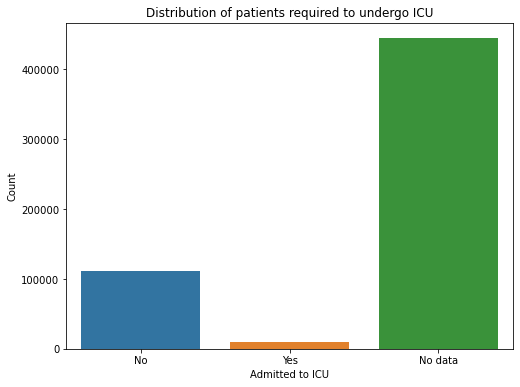

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(x='icu',data=df2)
plt.title('Distribution of patients required to undergo ICU')
plt.xlabel('Admitted to ICU')
plt.ylabel('Count')
plt.xticks([0,1,2],['No','Yes','No data'])
plt.show()

#### Insight

* Most of the data for ICU requirement is missing
* There is a low number of patients admitted to ICU
* There is an imbalance distribution between yes and no column

#### Note

- Since the icu feature is our target variable, we can drop rows which indicates missing or no value.

In [9]:
# dropping missing/no data in icu column

df3 = df2[df2['icu'].isin([0,1])]
df3.shape

(121788, 23)

### Test result and ICU requirement

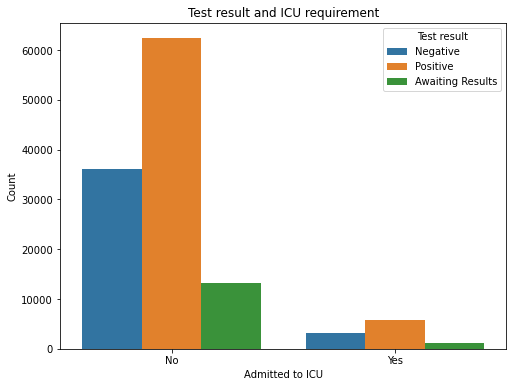

In [10]:
plt.figure(figsize=(8,6))

plot = sns.countplot(x='icu',hue='covid_res',data=df3)
plot.legend_.set_title('Test result')
labels = ['Negative','Positive','Awaiting Results']
for text, label in zip(plot.legend_.texts, labels): 
    text.set_text(label)

plt.title('Test result and ICU requirement')
plt.xlabel('Admitted to ICU')
plt.ylabel('Count')
plt.xticks([0,1],['No','Yes'])

plt.show()

#### Insight

* Most of the covid positive patients are not admitted to ICU
* We can also see some patients admitted to ICU even though they are negative in test results. Maybe these patients have different health complications.

### Test result and ICU requirement based on sex

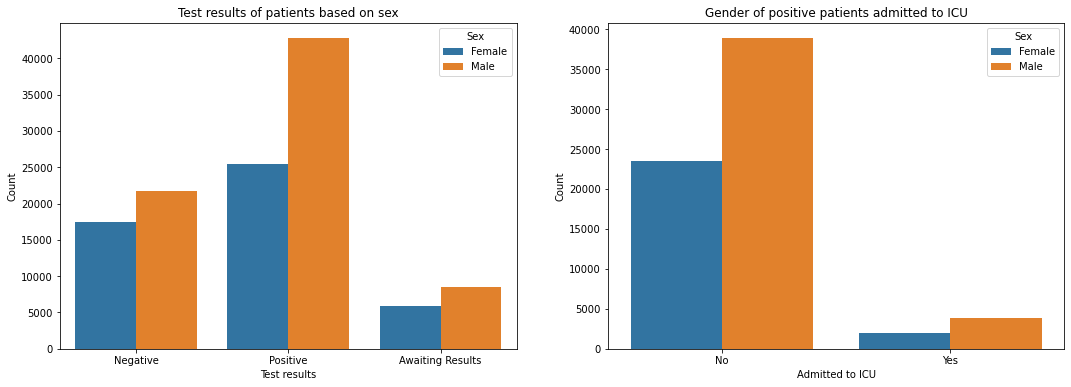

In [11]:
fig,ax = plt.subplots(ncols=2,figsize=(18,6))

data = [df3,df3[df3['covid_res']==1]]
features = ['covid_res','icu']
titles = ['Test results of patients based on sex','Gender of positive patients admitted to ICU']
xlabels = ['Test results','Admitted to ICU']
xticklabels = [['Negative','Positive','Awaiting Results'],['No','Yes']]
for i in range(2):
    plot = sns.countplot(x=features[i],hue='sex',data=data[i],ax=ax[i])
    plot.legend_.set_title('Sex')
    labels = ['Female','Male']
    for text, label in zip(plot.legend_.texts, labels): 
        text.set_text(label)
    ax[i].set_title(titles[i])    
    ax[i].set_xlabel(xlabels[i])
    ax[i].set_ylabel('Count')
    ax[i].set_xticks(range(len(xticklabels[i])))
    ax[i].set_xticklabels(xticklabels[i])
plt.show()

#### Insight

* We can see that male tends to have higher counts in all categories since there are more male patients than female in the dataset.
* Based on these graphs and distribution of sex in the dataset, we can see that sex doesn't affect test results and being admitted to ICU.

### Test result and ICU requirement based on patient type

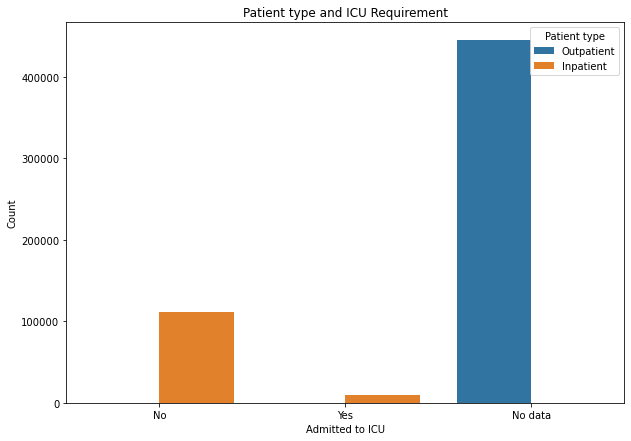

In [12]:
plt.figure(figsize=(10,7))

plot = sns.countplot(x='icu',hue='patient_type',data=df2)
plot.legend_.set_title('Patient type')
labels = ['Outpatient','Inpatient']
for text, label in zip(plot.legend_.texts, labels): 
    text.set_text(label)

plt.title('Patient type and ICU Requirement')
plt.xlabel('Admitted to ICU')
plt.ylabel('Count')
plt.xticks([0,1,2],['No','Yes','No data'])

plt.show()

In [13]:
icu_status = ['Not admitted','Admitted','No data']

for i in range(3):
    print(icu_status[i])
    print(df2[df2['icu']==i]['patient_type'].value_counts().rename({0:'Outpatient',1:'Inpatient'}).to_dict())
    print()

Not admitted
{'Inpatient': 111676}

Admitted
{'Inpatient': 10112}

No data
{'Outpatient': 444689, 'Inpatient': 125}



#### Insight

* We can see that all outpatient does not have data in icu column which means that all the data that we will be using are  inpatient.

#### Note

* I used df2 dataframe (missing data are not yet dropped) in constructing the graph.
* We can now drop the patient_type feature since all the values are similar

In [14]:
df4 = df3.drop('patient_type',axis='columns')
df4.head()

,id,sex,entry_date,date_symptoms,date_died,age,covid_res,intubed,pneumonia,pregnancy,...,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,icu
2,167386,0,06-04-2020,01-04-2020,9999-99-99,54,1,0,0,0,...,0,0,0,0,0,1,0,0,2,0
3,0b5948,1,17-04-2020,10-04-2020,9999-99-99,30,1,0,1,2,...,0,0,0,0,0,0,0,0,2,0
4,0d01b5,0,13-04-2020,13-04-2020,22-04-2020,60,1,0,0,0,...,0,0,1,0,1,0,0,0,2,0
5,1beec8,1,16-04-2020,16-04-2020,29-04-2020,47,1,0,1,2,...,0,0,0,0,0,0,0,0,2,1
6,1.75E+56,1,22-04-2020,13-04-2020,9999-99-99,63,1,0,0,2,...,0,0,1,0,0,0,0,0,2,0


### Test result and ICU requirement based on the number of days passed since the symptoms occured

<br>

* We will be creating a feature "num_days_symptoms" which means the number of days passed when the symptoms occured before testing.
* This feature will be derived from entry_date column and date_symptoms column.

In [15]:
# converting these columns into datetime
df4['entry_date'] = pd.to_datetime(df4['entry_date'],dayfirst=True)
df4['date_symptoms'] = pd.to_datetime(df4['date_symptoms'],dayfirst=True)

df4['num_days_symptoms'] = (df4['entry_date'] - df4['date_symptoms']).apply(lambda x: x.days)
df4['num_days_symptoms'].head()

2    5
3    7
4    0
5    0
6    9
Name: num_days_symptoms, dtype: int64

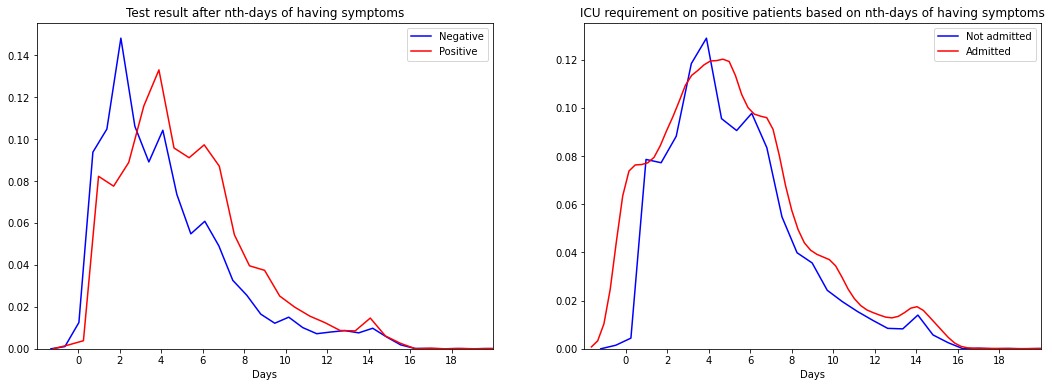

In [16]:
negative = df4[df4['covid_res']==0]
positive = df4[df4['covid_res']==1]

# we are only considering the icu admission of positive patients
icu_no = positive[positive['icu']==0]
icu_yes = positive[positive['icu']==1]

fig,ax = plt.subplots(ncols=2,figsize=(18,6))

data = [[negative,positive],[icu_no,icu_yes]]
titles = [
    'Test result after nth-days of having symptoms',
    'ICU requirement on positive patients based on nth-days of having symptoms'
]
labels = [['Negative','Positive'],['Not admitted','Admitted']]

for x in range(2):
    for y in range(2):
        sns.kdeplot(data[x][y]['num_days_symptoms'],color=['b','r'][y],ax=ax[x],label=labels[x][y])
    ax[x].set_title(titles[x])
    ax[x].set_xlabel('Days')
    ax[x].set_xlim(-2,20)
    ax[x].set_xticks(range(0,20,2))
    ax[x].legend()

plt.show()

#### Insight

* On the first graph, we can see that many patients test positive on the same day that symptoms occured.
* We can also see that there is a lot of patients that test positive between 2-8 days of having symptoms.
* On the second graph, we can see that half of positive patients with 0-8 days of symptoms were admitted to ICU.

### Test result and ICU requirement based on age

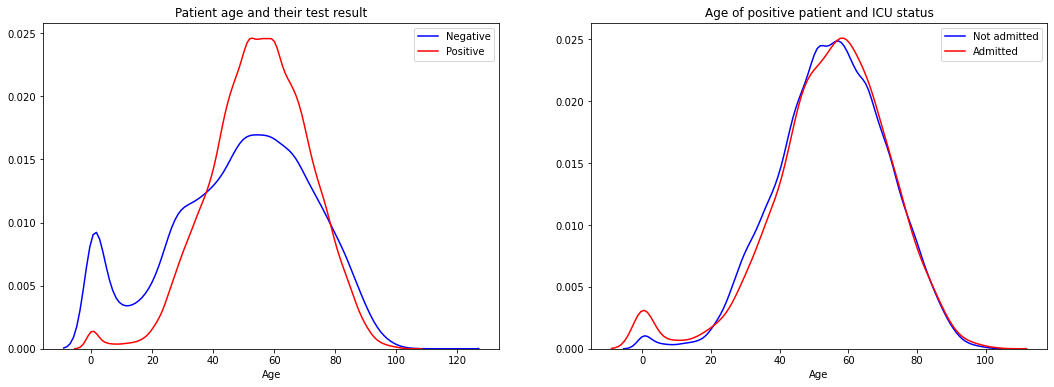

In [17]:
fig,ax = plt.subplots(ncols=2,figsize=(18,6))

data = [[negative,positive],[icu_no,icu_yes]]
titles = [
    'Patient age and their test result',
    'Age of positive patient and ICU status'
]
labels = [['Negative','Positive'],['Not admitted','Admitted']]

for x in range(2):
    for y in range(2):
        sns.kdeplot(data[x][y]['age'],color=['b','r'][y],ax=ax[x],label=labels[x][y])
    ax[x].set_title(titles[x])
    ax[x].set_xlabel('Age')
    ax[x].legend()

plt.show()

#### Insight

* Most of the patients that test positive ages between 40 and 80.
* With patients test positive, half of them are admitted to ICU.

### ICU requirement on positive patients with other health complications

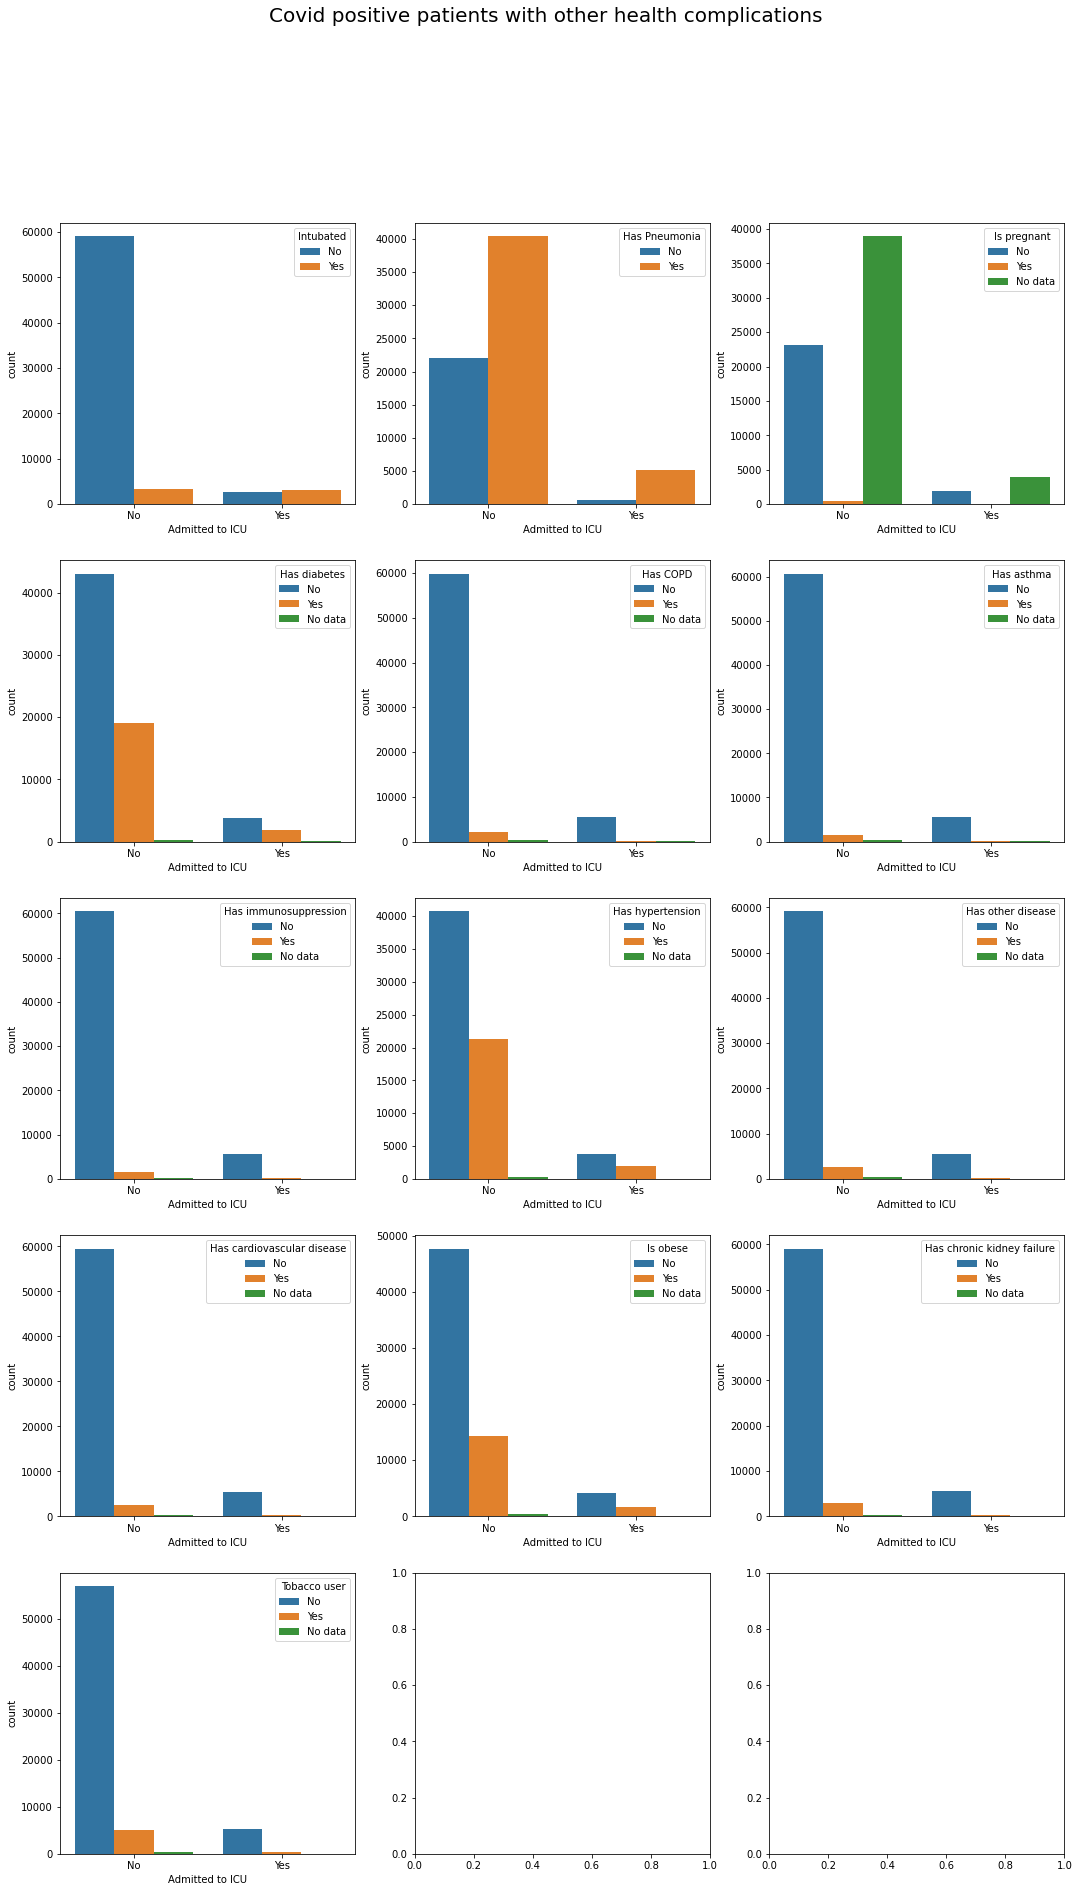

In [18]:
# column name and description
columns = [
    ['intubed', 'Intubated'],
    ['pneumonia', 'Has Pneumonia'],
    ['pregnancy', 'Is pregnant'],
    ['diabetes', 'Has diabetes'],
    ['copd', 'Has COPD'],
    ['asthma', 'Has asthma'],
    ['inmsupr', 'Has immunosuppression'],
    ['hypertension', 'Has hypertension'],
    ['other_disease', 'Has other disease'],
    ['cardiovascular', 'Has cardiovascular disease'],
    ['obesity', 'Is obese'],
    ['renal_chronic', 'Has chronic kidney failure'],
    ['tobacco','Tobacco user']
]
legend = ['No','Yes','No data']

fig,ax = plt.subplots(nrows=5,ncols=3,figsize=(18,30))

counter = 0
for row in range(5):
    for column in range(3):  
        plot = sns.countplot(x='icu',hue=columns[counter][0],data=positive,ax=ax[row][column])
        plot.legend_.set_title(columns[counter][1])
        for text, label in zip(plot.legend_.texts, legend): 
            text.set_text(label) 
        ax[row][column].set_xlabel('Admitted to ICU')
        ax[row][column].set_xticks(range(2))
        ax[row][column].set_xticklabels(['No','Yes'])
        counter+=1
        if row == 4 and column == 0:
            break

plt.suptitle('Covid positive patients with other health complications',fontsize=20)
plt.show()

#### Insights

* Half of intubated positive patients are admitted to ICU
* Most of the positive patients have pneumonia
* There is a lot of missing data in pregnancy column. We will look into these missing data later.
* Obese patients have slightly higher chance of being admitted to ICU.
* Rest of the features have the same ratio in terms of having and not having admitted to ICU.

# Working with features

* Dealing with missing values in pregnancy column
* Dealing with remaining missing values in other columns
* Convert test result into dummy variables
* Feature selection

### Dealing with missing values

* We saw from the graphs above the huge amount of missing values in pregnancy column. Let see these missing values.

In [19]:
prenancy_dict = {0:'Not pregnant',1:'Pregnant',2:'Missing data'}
gender_dict = {0:'Female',1:'Male'}

print('Pregnancy column value counts:')
print(df4['pregnancy'].value_counts().rename(prenancy_dict).to_dict())

print('\nGender of patients with missing value in pregnancy:')
print(df4[df4['pregnancy']==2]['sex'].value_counts().rename(gender_dict).to_dict())

Pregnancy column value counts:
{'Missing data': 73165, 'Not pregnant': 47554, 'Pregnant': 1069}

Gender of patients with missing value in pregnancy:
{'Male': 72999, 'Female': 166}


* We see that the patients with missing value concerning pregnancy are male. 
* We can set these male patients as not pregnant and drop the remaining female patients.

In [20]:
# dropping female patients with missing value in pregnancy
df5 = df4.drop(df4[(df4['pregnancy']==2) & (df4['sex']==0)].index,axis='index')

# converting missing values into not pregnant since they are all male
df5['pregnancy'].replace(2,0,inplace=True)
df5['pregnancy'].value_counts()

0    120553
1      1069
Name: pregnancy, dtype: int64

### Dealing with remaining missing values in other columns

In [21]:
columns = [
    'intubed','pneumonia','pregnancy','diabetes','copd',
    'asthma','inmsupr','hypertension','other_disease','cardiovascular',
    'obesity','renal_chronic','tobacco','contact_other_covid','icu'
]
legend = {0:'No',1:'Yes',2:'No data'}

for column in columns:
    print('{}: {}'.format(column,df5[column].value_counts().rename(legend).to_dict()))

intubed: {'No': 111686, 'Yes': 9936}
pneumonia: {'Yes': 73577, 'No': 48045}
pregnancy: {'No': 120553, 'Yes': 1069}
diabetes: {'No': 85555, 'Yes': 35404, 'No data': 663}
copd: {'No': 115557, 'Yes': 5487, 'No data': 578}
asthma: {'No': 117907, 'Yes': 3137, 'No data': 578}
inmsupr: {'No': 116237, 'Yes': 4714, 'No data': 671}
hypertension: {'No': 80763, 'Yes': 40257, 'No data': 602}
other_disease: {'No': 113317, 'Yes': 7272, 'No data': 1033}
cardiovascular: {'No': 114687, 'Yes': 6295, 'No data': 640}
obesity: {'No': 95927, 'Yes': 25068, 'No data': 627}
renal_chronic: {'No': 113791, 'Yes': 7228, 'No data': 603}
tobacco: {'No': 110264, 'Yes': 10726, 'No data': 632}
contact_other_covid: {'No data': 62043, 'No': 42351, 'Yes': 17228}
icu: {'No': 111529, 'Yes': 10093}


* We can see the huge amount of missing values in contact_other_covid column. We can drop this feature since there is a lot of missing values present and also it is not needed in our prediction.
* We will also drop all the rows with missing values

In [22]:
columns = [
    'diabetes','copd','asthma',
    'inmsupr','hypertension','other_disease','cardiovascular',
    'obesity','renal_chronic','tobacco'
]

# dropping contact_other_covid column
df6 = df5.drop('contact_other_covid',axis='columns')

# dropping all rows with missing values
df7 = df6[columns].replace(2,np.nan).dropna().astype('int8').merge(
            df6[['id','sex', 'entry_date', 'date_symptoms', 'date_died', 'age',
           'covid_res','intubed', 'pneumonia', 'pregnancy','icu', 'num_days_symptoms']],
            left_index=True, right_index=True
        )

### Convert test result into dummy variables

In [23]:
covid_results = pd.get_dummies(df7['covid_res'].replace({0:'covid_negative',1:'covid_positive'}),drop_first=True)
covid_results.head()

,covid_negative,covid_positive
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1


In [24]:
df8 = pd.concat([df7,covid_results],axis='columns')

### Feature selection

In [25]:
columns = ['sex','age','num_days_symptoms','intubed', 
           'pneumonia', 'pregnancy','diabetes', 'copd', 'asthma',
           'inmsupr', 'hypertension','other_disease', 'cardiovascular', 'obesity',
           'renal_chronic','tobacco','covid_negative','covid_positive','icu'
          ]

# dropped id, entry_date, date_symptoms, date_died, covid_res
df9 = df8[columns]

In [26]:
df9.head()

,sex,age,num_days_symptoms,intubed,pneumonia,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,covid_negative,covid_positive,icu
2,0,54,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,1,30,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,60,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
5,1,47,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1
6,1,63,9,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


# Model Building

* Importing necessary libraries
* Performing oversampling using SMOTE
* Splitting the dataset into training and testing data
* Feature Scaling
* Creating ANN model
* Training the model
* Evaluating the model

In [27]:
# Performing oversampling using SMOTE
from imblearn.over_sampling import SMOTE

# Splitting and scaling the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Creating ANN model
import tensorflow as tf
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense

# Evaluating the model
from sklearn.metrics import classification_report, confusion_matrix, recall_score

### Performing oversampling using SMOTE

In [28]:
X = df9.drop('icu',axis='columns')
y = df9['icu']

icu_before_oversampling = y.value_counts()
print('ICU values before oversampling')
print(f'0: {icu_before_oversampling[0]}')
print(f'1: {icu_before_oversampling[1]}')

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

icu_after_oversampling = y_res.value_counts()
print('\nICU values after oversampling')
print(f'0: {icu_after_oversampling[0]}')
print(f'1: {icu_after_oversampling[1]}')

ICU values before oversampling
0: 110201
1: 9825

ICU values after oversampling
0: 110201
1: 110201


### Splitting the dataset into training and testing data

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=0,stratify=y_res)

print('Lenght of training data:',len(X_train))
print('Lenght of testing data:',len(X_test))

Lenght of training data: 154281
Lenght of testing data: 66121


### Feature Scaling

* We will be using MinMaxScaler from sklearn library.
* This scales your data between 0 and 1.

In [30]:
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
X_train.shape

(154281, 18)

### Creating ANN model

In [32]:
model = Sequential()

# input layer
model.add(Input(shape=(18,)))

# hidden layers
model.add(Dense(40,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(160,activation='relu'))
model.add(Dense(160,activation='relu'))
model.add(Dense(160,activation='relu'))
model.add(Dense(160,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(40,activation='relu'))

# output layer
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.Recall()])

### Training the model

In [33]:
history = model.fit(x=X_train,y=y_train.values,validation_data=(X_test,y_test.values),batch_size=256,epochs=300)

Epoch 1/300
603/603 [==============================] - 3s 5ms/step - loss: 0.5395 - recall: 0.6218 - val_loss: 0.5303 - val_recall: 0.6216
Epoch 2/300
603/603 [==============================] - 3s 5ms/step - loss: 0.5271 - recall: 0.6241 - val_loss: 0.5267 - val_recall: 0.6209
Epoch 3/300
603/603 [==============================] - 3s 5ms/step - loss: 0.5247 - recall: 0.6549 - val_loss: 0.5327 - val_recall: 0.5791
Epoch 4/300
603/603 [==============================] - 3s 4ms/step - loss: 0.5230 - recall: 0.6545 - val_loss: 0.5223 - val_recall: 0.5891
Epoch 5/300
603/603 [==============================] - 3s 6ms/step - loss: 0.5202 - recall: 0.6346 - val_loss: 0.5225 - val_recall: 0.6113
Epoch 6/300
603/603 [==============================] - 3s 4ms/step - loss: 0.5191 - recall: 0.6620 - val_loss: 0.5250 - val_recall: 0.6681
Epoch 7/300
603/603 [==============================] - 3s 4ms/step - loss: 0.5183 - recall: 0.6608 - val_loss: 0.5187 - val_recall: 0.5776
Epoch 8/300
603/603 [======

### Evaluating the model

* Training loss per epoch
* Model evaluation on test data
* Confusion Matrix
* Classification Report

#### Training loss per epoch

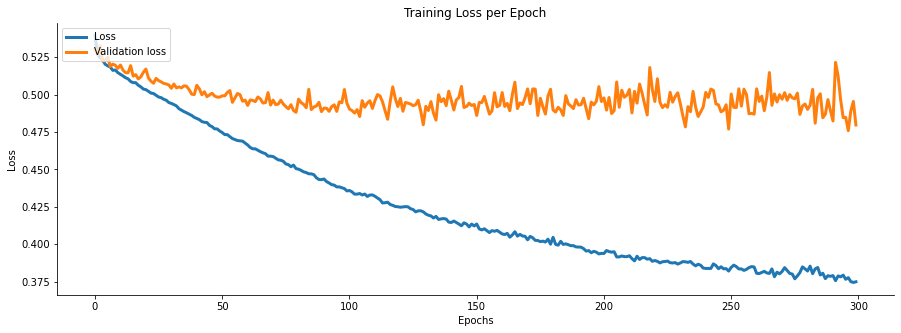

In [34]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(15,5))
plt.plot(loss,lw=3)
plt.plot(val_loss,lw=3)
plt.title('Training Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss', 'Validation loss'], loc='upper left')
sns.despine()

#### Model evaluation on test data

In [35]:
# Evaluate our model in test data
model.evaluate(X_test,y_test)

2067/2067 [==============================] - 5s 2ms/step - loss: 0.4796 - recall: 0.8125


[0.47963666915893555, 0.8125227093696594]

#### Confusion Matrix

In [36]:
y_predicted = [1 if y >= 0.5 else 0 for y in model.predict(X_test).flatten()]
y_predicted[:5]

[1, 0, 0, 0, 0]

In [37]:
confusion_matrix_result = confusion_matrix(y_test,y_predicted)
confusion_matrix_result

array([[25114,  7947],
       [ 6198, 26862]])

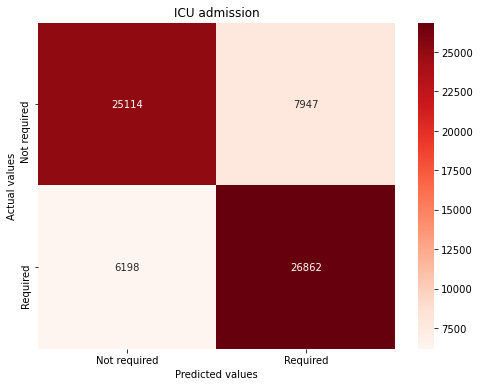

In [38]:
labels = ['Not required','Required']
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_result,annot=True,cmap='Reds',fmt='.0f',xticklabels=labels,yticklabels=labels)
plt.title('ICU admission')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

#### Classification Report

In [39]:
classification_report_result = classification_report(y_test,y_predicted)
print(classification_report_result)

              precision    recall  f1-score   support

           0       0.80      0.76      0.78     33061
           1       0.77      0.81      0.79     33060

    accuracy                           0.79     66121
   macro avg       0.79      0.79      0.79     66121
weighted avg       0.79      0.79      0.79     66121



# Saving the model

* Save the model
* Load model and evaluate recall

### Save the model

In [40]:
model.save('/kaggle/working/icu_requirement_prediction_model.h5')

### Load model and evaluate recall

In [41]:
loaded_model = tf.keras.models.load_model('./icu_requirement_prediction_model.h5')
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                760       
_________________________________________________________________
dense_1 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_2 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_3 (Dense)              (None, 80)                3280      
_________________________________________________________________
dense_4 (Dense)              (None, 80)                6480      
_________________________________________________________________
dense_5 (Dense)              (None, 80)                6480      
_________________________________________________________________
dense_6 (Dense)              (None, 160)               1

In [42]:
loaded_model_y_predicted = [1 if y >= 0.5 else 0 for y in loaded_model.predict(X_test).flatten()]

print('Loaded model recall score:',recall_score(y_test,loaded_model_y_predicted))

Loaded model recall score: 0.8125226860254083


### If you like this kernel, please upvote!